In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('/content/data_with_tags.csv')
df.head()


,Sno,Title,Stars,Link,tags
0,0,The Ultimate Drawing Course - Beginner to Adva...,4.5,https://www.udemy.com/course/the-ultimate-draw...,learn 1 important building block ar
1,1,Character Art School: Complete Character Drawi...,4.5,https://www.udemy.com/course/character-art-sch...,learn draw people character designs profession...
2,2,Complete Blender Creator: Learn 3D Modelling f...,4.6,https://www.udemy.com/course/blendertutorial/,use blender create beautiful 3d models video g...
3,3,Design Thinking in 3 Steps,4.4,https://www.udemy.com/course/designit-design-t...,understand audience envision creative solution...
4,4,Illustrator CC 2020 MasterClass,4.6,https://www.udemy.com/course/illustrator-cc-ma...,master adobe illustrator cc in-depth training ...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD


In [4]:
# tfv_matrix=tfv.fit_transform(df['tags'])

In [5]:
def get_recommendation_tfidf_cosinSim(user_record,df):
  data=df
  data.loc[len(df)]=user_record
  tfv= TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')
  data['tags']=data['tags'].fillna('')
  tfv_matrix=tfv.fit_transform(data['tags'])
  # k-means clustering 
  kmeans_tfidf = KMeans(n_clusters=10, random_state=42).fit(tfv_matrix)
  # sillhouette score
  tfidf_silhouette_score = silhouette_score(tfv_matrix, kmeans_tfidf.labels_)
  #average similarity between all pairs of documents in the dataset 
  cos_sim=cosine_similarity(tfv_matrix,tfv_matrix)
  tfidf_avg_similarity = np.mean(cos_sim)
  # performance evaluation metrics of tfidf 
  # - print('tfidf silhouette score-',tfidf_silhouette_score)
  # - print('tfidf avg. similarity-',tfidf_avg_similarity)
  #to retrive top recommended courses
  indices=pd.Series(df.index,index=data['Title']).drop_duplicates()
  idx=indices[user_record['Title']]
  cosSim_scores=list(enumerate(cos_sim[idx]))
  cosSim_scores=sorted(cosSim_scores,key=lambda x:x[1],reverse=True)
  cosSim_scores=cosSim_scores[1:16]
  course_indices=[i[0] for i in cosSim_scores]
  df_new=df.iloc[course_indices]
  df_new=df_new.sort_values(by=['Stars'],ascending=False)
  return [df_new,tfidf_silhouette_score,tfidf_avg_similarity,cos_sim]

In [6]:
def get_recommendation_countVector_cosinSim(user_record,df):
  data=df
  data.loc[len(df)]=user_record
  cv= CountVectorizer(min_df=3, max_features=None, strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')
  data['tags']=data['tags'].fillna('')
  cv_matrix=cv.fit_transform(data['tags'])
  # k-means clustering 
  kmeans_cv = KMeans(n_clusters=10, random_state=42).fit(cv_matrix)
  # sillhouette score
  cv_silhouette_score = silhouette_score(cv_matrix, kmeans_cv.labels_)
  #average similarity between all pairs of documents in the dataset 
  cos_sim=cosine_similarity(cv_matrix,cv_matrix)
  cv_avg_similarity = np.mean(cos_sim)
  # performance evaluation metrics of tfidf 
  # - print('count vector silhouette score-',cv_silhouette_score)
  # - print('count vector avg. similarity-',cv_avg_similarity)
  #to retrive top recommended courses
  indices=pd.Series(df.index,index=data['Title']).drop_duplicates()
  idx=indices[user_record['Title']]
  cosSim_scores=list(enumerate(cos_sim[idx]))
  cosSim_scores=sorted(cosSim_scores,key=lambda x:x[1],reverse=True)
  cosSim_scores=cosSim_scores[1:16]
  course_indices=[i[0] for i in cosSim_scores]
  df_new=df.iloc[course_indices]
  df_new=df_new.sort_values(by=['Stars'],ascending=False)
  return [df_new,cv_silhouette_score,cv_avg_similarity,cos_sim]


In [7]:
id=df.shape[0]+1
title='user_rec'+str(id)
user_record={'Sno':id,'Title':title,'Stars':'0','Link':'none','tags':'netbeans,mysql database design,basic c,basic programming,basic html,htmlandxml,basic java,linux,object oriented perl,mysql,javascript,vbnet,html 5,jquery ui,aspnet,css3,visual paradigm,c,perl automation,java,notepad,basic photoshop,archimate,perl,jquery,css,asp,visual studio,web designing,eclipse,microsoft sql server,servlets,core java,web development,sql,web applications,vb 60,jsp,oracle 10g,shell scripting,microsoft office,ajax,net,basic sql,editorial strategy,php'}
print(df.shape)
recommedations_1,tfidf_silhouette_score,tfidf_avg_similarity,similarity_matrix1=get_recommendation_tfidf_cosinSim(user_record,df)

(23448, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
id=df.shape[0]+1
title='user_rec'+str(id)
user_record={'Sno':id,'Title':title,'Stars':'0','Link':'none','tags':'netbeans,mysql database design,basic c,basic programming,basic html,htmlandxml,basic java,linux,object oriented perl,mysql,javascript,vbnet,html 5,jquery ui,aspnet,css3,visual paradigm,c,perl automation,java,notepad,basic photoshop,archimate,perl,jquery,css,asp,visual studio,web designing,eclipse,microsoft sql server,servlets,core java,web development,sql,web applications,vb 60,jsp,oracle 10g,shell scripting,microsoft office,ajax,net,basic sql,editorial strategy,php'}
recommedations_2,cv_silhouette_score,cv_avg_similarity,similarity_matrix2=get_recommendation_countVector_cosinSim(user_record,df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


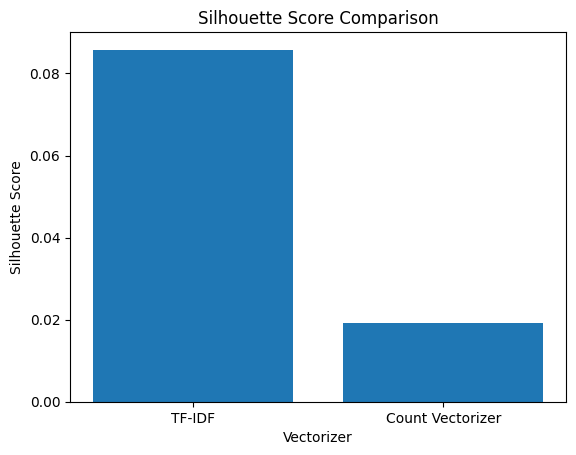

In [9]:
plt.bar(['TF-IDF', 'Count Vectorizer'], [tfidf_silhouette_score, cv_silhouette_score])
plt.title("Silhouette Score Comparison")
plt.xlabel("Vectorizer")
plt.ylabel("Silhouette Score")
plt.show()

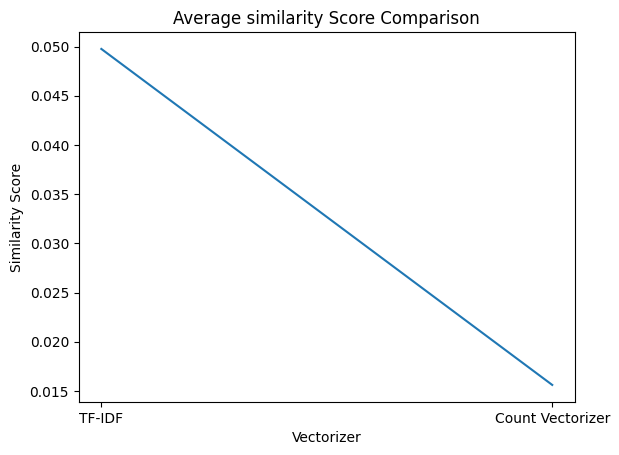

In [10]:
plt.plot(['TF-IDF', 'Count Vectorizer'], [tfidf_avg_similarity, cv_avg_similarity])
plt.title("Average similarity Score Comparison")
plt.xlabel("Vectorizer")
plt.ylabel("Similarity Score")
plt.show()

In [11]:
print(tfidf_avg_similarity," ",tfidf_silhouette_score)
print(cv_avg_similarity," ",cv_silhouette_score)

0.04975710235102026   0.08578365819096362
0.015614071286088693   0.019281271438424008


In [14]:
recommedations_1

,Sno,Title,Stars,Link,tags
19800,9838,SQL Server 2017 in 90 minutes,4.9,https://www.udemy.com/course/sql-server-2017-i...,SQL Server QuickView
19590,9628,Advance SQL in VB.Net :Design Database Apps in...,4.7,https://www.udemy.com/course/using-barcode-sca...,"3 in 1: Barcode Scanner App in VB .net, Advanc..."
18899,8937,SQL - Microsoft SQL Crash Course for Absolute ...,4.7,https://www.udemy.com/course/complete-microsof...,This Crash course uses Microsoft SQL Server. T...
19815,9853,Microsoft Access SQL: SQL from Absolute Beginn...,4.6,https://www.udemy.com/course/microsoft-access-...,SQL Using Microsoft Access 2019 but applicable...
23207,3281,Beginning SQL Server,4.5,https://www.coursera.org/learn/beginning-sql-s...,backup sql server management studio microsof...
16937,6975,Software Development Master Class for Absolute...,4.4,https://www.udemy.com/course/software-developm...,Basic Programming Concepts with .Net Core and C#
19374,9412,Perl Fundamentals,4.1,https://www.udemy.com/course/perl-fundamentals/,Perl Fundamentals
17755,7793,Learn Microsoft SQL Server from scratch,4.1,https://www.udemy.com/course/learn-microsoft-t...,Microsoft SQL Training
19498,9536,HTML5 & CSS3 ♦ Build responsive website from s...,3.9,https://www.udemy.com/course/html-5-css-3-make...,Learn and summarize information about basic HT...
16212,6250,Perl Building Blocks - An Introduction to Perl,3.8,https://www.udemy.com/course/perlprogramming/,"Learn About Perl Programming, Perl Functions, ..."
